<a href="https://colab.research.google.com/github/Shreyas0012/ML_LAB-Assignment/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
df = sns.load_dataset('mpg')
df = df.dropna()
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [42]:
X = df[['cylinders','horsepower','weight','displacement']]
y = df['mpg']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [44]:
lin = LinearRegression()
lin.fit(X_train, y_train)
pred_lin = lin.predict(X_test)

rmse_lin = np.sqrt(mean_squared_error(y_test, pred_lin))
r2_lin = r2_score(y_test, pred_lin)

rmse_lin, r2_lin

(np.float64(4.2298860753856395), 0.6494566661462682)

In [45]:
poly2 = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('model', LinearRegression())])

poly3 = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('model', LinearRegression())])

poly2.fit(X_train, y_train)
poly3.fit(X_train, y_train)

pred2 = poly2.predict(X_test)
pred3 = poly3.predict(X_test)

rmse2 = np.sqrt(mean_squared_error(y_test, pred2))
rmse3 = np.sqrt(mean_squared_error(y_test, pred3))

r2_2 = r2_score(y_test, pred2)
r2_3 = r2_score(y_test, pred3)

rmse2, rmse3, r2_2, r2_3


(np.float64(4.13359368305332),
 np.float64(4.1522301561777555),
 0.6652350805577634,
 0.6622096736464055)

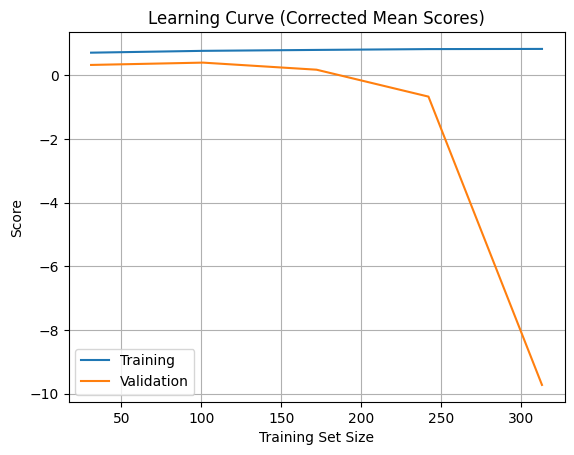

In [46]:
train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training')
plt.plot(train_sizes, val_scores_mean, label='Validation')
plt.legend()
plt.title('Learning Curve (Corrected Mean Scores)')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.grid(True)
plt.show()


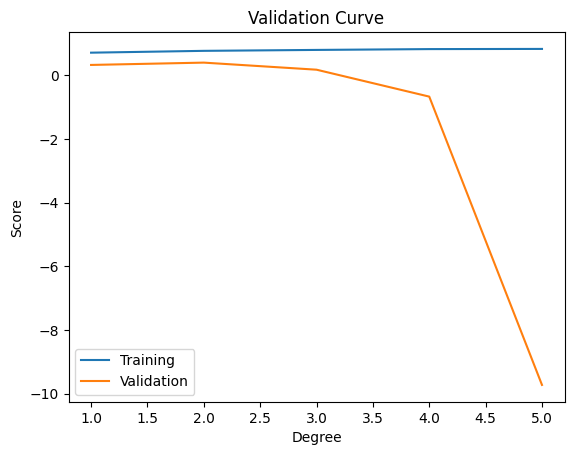

In [47]:
degrees = [1,2,3,4,5]

train_scores, val_scores = validation_curve(
    Pipeline([('poly', PolynomialFeatures()), ('model', LinearRegression())]),
    X, y, param_name='poly__degree', param_range=degrees, cv=5)

plt.plot(degrees, train_scores.mean(axis=1), label='Training')
plt.plot(degrees, val_scores.mean(axis=1), label='Validation')
plt.xlabel('Degree')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()
